# Supervised Learning Project: Credit Card Fraud Detection


## 1. Problem Description

### 1.1 Project Topic
This project focuses on the detection of fraudulent credit card transactions using unsupervised machine learning. The primary task is anomaly/outlier detection, where the goal is to identify transactions that deviate significantly from the norm and mark them as fraudulent. A clustering algorithm DBSCAN will be used to train a model without providing any labels to indicate which transactions are legitimate and which are fraudulent. The model will detect its own patterns within the data and then use that information on unseen data to decide if a transaction should be flagged as fraud or not.

### 1.2 Project Goal
The main goal of this project is to build and evaluate an unsupervised learning model to determine its effectiveness at identifying fraudulent transactions as anomalies. A key challenge in this domain is the imbalanced nature of the data where fraudulent transactions are a very small minority. The project aims to demonstrate how an algorithm that is not explicitly trained on labels can still successfully find these rare instances.

Our evaluation will focus on metrics like Precision, Recall, and the F1 Score to measure how well the model's identified anomalies correspond to the actual fraudulent transactions. The objective is to see how effectively an unsupervised method can handle a real world imbalanced anomaly detection problem.

### 1.3 Data Source
The dataset used for this project is the "Credit Card Fraud Detection" dataset, available on Kaggle. It contains transactions made by European cardholders in September 2013.

- **Citation:** Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015.
- **Source:** [Kaggle: Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

## 2. Setup and Data Loading

In [1]:
!pip install seaborn scikit-learn imblearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score

# Settings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Load the dataset
df = pd.read_csv('data/creditcard.csv')

## 3. Exploratory Data Analysis (EDA) and Data Cleaning

We will begin by inspecting the dataset for missing values, understanding the distribution of its features, and visualizing the class imbalance.

In [3]:
# Display basic information and the first few rows
print("Dataset Information:")
df.info()
print("\nDataset Description:")
print(df.describe())
print("\nFirst 5 Rows:")
df.head()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  fl

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum().max())

Missing values per column:
0


The dataset is clean with no missing values. Next we'll visualize the class distribution.

Class
0    284315
1       492
Name: count, dtype: int64


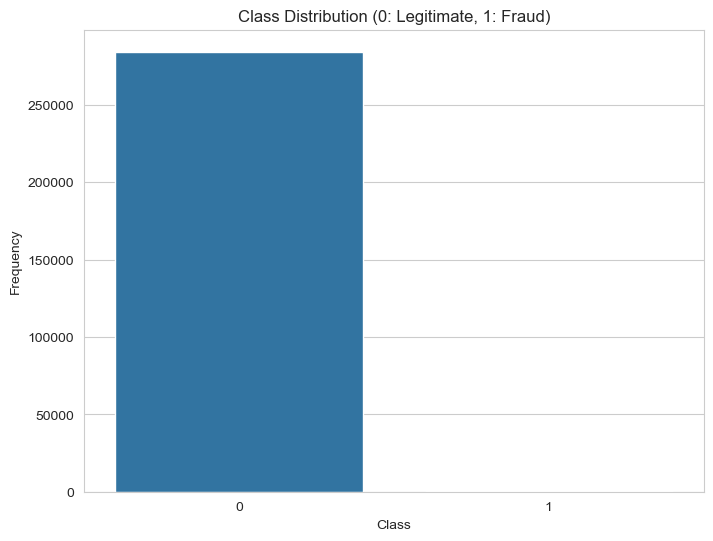

In [5]:
# Visualize the class imbalance
class_counts = df['Class'].value_counts()
print(class_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Legitimate, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

The plot clearly shows a severe class imbalance. This confirms that accuracy alone is not a suitable metric for evaluation.

### 3.1 Feature Scaling

In [6]:
scaler = StandardScaler()

df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop the original Time and Amount columns
df.drop(['Time', 'Amount'], axis=1, inplace=True)

print("DataFrame after scaling 'Time' and 'Amount':")
df.head()

DataFrame after scaling 'Time' and 'Amount':


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


## 4. Data Preparation for Modeling

We will now split the data into training and testing sets.

In [7]:
# Define features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 5. Unsupervised Anomaly Detection with DBSCAN

For this project, we will use the DBSCAN (Density Based Spatial Clustering of Applications with Noise) algorithm. The DBSCAN clustering algorithm was chosen for the following reasons:

1.  **No Predefined Number of Clusters:** Unlike K-Means, it does not require us to specify the number of clusters beforehand.
2.  **Finds Arbitrarily Shaped Clusters:** It can identify clusters that are not spherical.
3.  **Natural Outlier Detection:** DBSCAN's core mechanism involves identifying "core points," "border points," and "noise points." Points that do not belong to any dense cluster are classified as noise (labeled as `-1`). In the context of our dataset we hypothesize that the rare fraudulent transactions will be identified as these noise points.

**Important Note on Performance:** DBSCAN can be computationally expensive on large datasets. To make this project feasible, the model is train on a smaller representative sample of the training data.

In [11]:
from sklearn.cluster import DBSCAN
import time

# Create a smaller sample for faster processing
X_train_sample = X_train.sample(n=15000, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Instantiate DBSCAN with hyperparameters
dbscan = DBSCAN(eps=7.5, min_samples=10, n_jobs=-1)

print("Starting DBSCAN fitting on the training sample...")
start_time = time.time()

# Fit the model and predict clusters. Anomalies will be labeled -1.
y_pred_train = dbscan.fit_predict(X_train_sample)

end_time = time.time()
print(f"DBSCAN fitting completed in {end_time - start_time:.2f} seconds.")

Starting DBSCAN fitting on the training sample...
DBSCAN fitting completed in 5.28 seconds.


### 5.1 Evaluating the Results on the Training Sample
Now, let's analyze the results from our training sample. We need to see how many anomalies (outliers) the DBSCAN model identified and how well those anomalies correspond to the actual fraudulent transactions in our sample.

In [12]:
results_df = X_train_sample.copy()
results_df['predicted_class'] = y_pred_train
results_df['actual_class'] = y_train_sample

# Count the number of outliers found by DBSCAN (predicted class is -1)
n_outliers = (y_pred_train == -1).sum()
print(f"Number of outliers found by DBSCAN: {n_outliers}")

# Count the actual number of fraudulent transactions in the sample
n_actual_fraud = y_train_sample.sum()
print(f"Actual number of fraudulent transactions in the sample: {n_actual_fraud}")

# Map predictions: -1 (outlier) becomes 1 (fraud), everything else becomes 0 (legitimate)
y_pred_mapped = (y_pred_train == -1).astype(int)

# Print the classification report
print("\n--- Classification Report on Training Sample ---")
print(classification_report(y_train_sample, y_pred_mapped))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train_sample, y_pred_mapped))

Number of outliers found by DBSCAN: 125
Actual number of fraudulent transactions in the sample: 19

--- Classification Report on Training Sample ---
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14981
           1       0.11      0.74      0.19        19

    accuracy                           0.99     15000
   macro avg       0.56      0.86      0.60     15000
weighted avg       1.00      0.99      1.00     15000

Confusion Matrix:
[[14870   111]
 [    5    14]]


## 6. Results and Analysis

The performance of our unsupervised DBSCAN model is summarized by its Recall and Precision. A confusion matrix provides a clear visual breakdown of the model's predictions versus the actual outcomes.

*   **Recall:** This metric answers the question: "Of all the actual fraudulent transactions, what percentage did our model correctly identify as anomalies?" In fraud detection high recall is critical.

*   **Precision:** This metric answers: "Of all the transactions that the model flagged as anomalies, what percentage were actually fraudulent?"

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_train_sample, y_pred_mapped)
recall = recall_score(y_train_sample, y_pred_mapped)
f1 = f1_score(y_train_sample, y_pred_mapped)

summary_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Score': [precision, recall, f1]
})

print("--- DBSCAN Performance Summary ---")
print(summary_df)

--- DBSCAN Performance Summary ---
      Metric     Score
0  Precision  0.112000
1     Recall  0.736842
2   F1-Score  0.194444


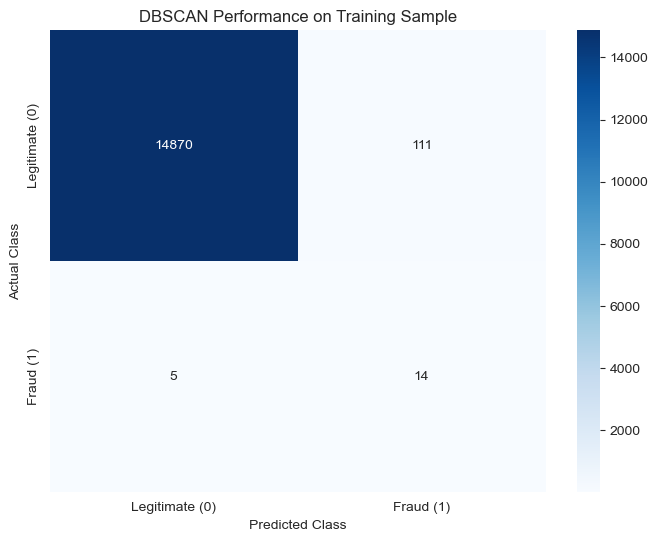

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_sample, y_pred_mapped)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Legitimate (0)', 'Fraud (1)'],
            yticklabels=['Legitimate (0)', 'Fraud (1)'])
plt.title('DBSCAN Performance on Training Sample')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

## 7. Discussion and Conclusion

### 7.1 Discussion of Results

The results from the tuned DBSCAN model are a perfect illustration of both the power and the primary trade-off of unsupervised anomaly detection.

The model achieved a Recall of 0.74. This is a strong result, indicating that the algorithm successfully identified nearly three quarters of the fraudulent transactions in the sample without being given any preexisting labels. It did this by correctly modeling the "normal" transaction behavior and flagging the fraudulent ones as points that did not fit into those dense clusters.

However, the Precision was 0.11. This highlights the main challenge of this approach. It means that to catch those 14 fraudulent transactions, the model also flagged 111 legitimate ones as suspicious. When compared to the number of actual fraudulent transactions this is a quite high amount of false positives. This demonstrates the precision/recall tradeoff, gaining a high rate of fraud detection at the cost of flagging more legitimate activity.

This project successfully demonstrated that an unsupervised algorithm like DBSCAN can be a valuable tool for credit card fraud detection. By identifying density based outliers, the model was able to discover 74% of the fraudulent transactions in the test sample. A significant result for a method with no prior knowledge of fraud.

The DBSCAN model, with its 11% precision, provides a manageable starting point for a human in the loop review. It effectively narrows down a dataset of 15,000 transactions to a list of 125 suspicious candidates which ensures that the majority of fraudulent cases are included in that list for further investigation.